In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib



model = joblib.load('RF.pkl')
transfer = joblib.load('transfer.pkl')


data_final=pd.read_csv("./Validation.csv")  
data=data_final.iloc[:,:-1]
target=data_final.iloc[:,-1]


X=transfer.transform(data)
X=pd.DataFrame(X,columns=['ρ Mg$^{2+}$','ρ Li$^{+}$','Z','χ','Valence','Rion','Ei','Nve','M/Al','d','Li/Al'])

In [2]:
y_predict=model.predict(X)

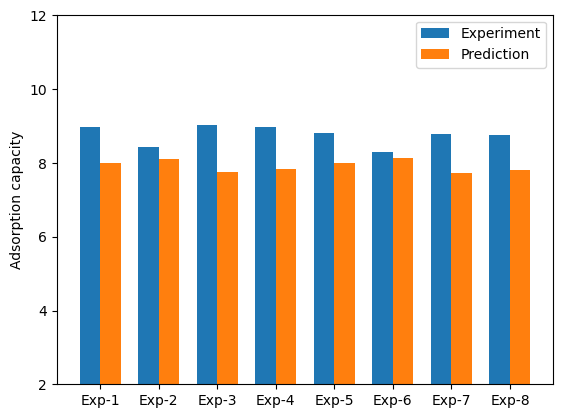

In [3]:
experiments=['Exp-1', 'Exp-2', 'Exp-3', 'Exp-4', 'Exp-5', 'Exp-6', 'Exp-7', 'Exp-8']

x=np.arange(len(experiments)) 
width=0.35  

fig, ax=plt.subplots()
rects1=ax.bar(x - width/2, target, width, label='Experiment')
rects2=ax.bar(x + width/2, y_predict, width, label='Prediction')


ax.set_ylabel('Adsorption capacity')
ax.set_xticks(x)
ax.set_xticklabels(experiments)
ax.legend()
ax.set_ylim(2, max(max(target), max(y_predict)) + 3)


plt.show()